In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
from sklearn import tree
import csv
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD 
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv', sep=',', low_memory = False)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [3]:
column_names = df.columns.values

In [4]:
for i in range(len(column_names)):
    df.columns.values[i] = df.columns.values[i].replace(" ", "")


In [5]:
df.shape

X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]


In [6]:
#Create train and test split for dataset
X_train, X_test, y_train_unthresholded, y_test_unthresholded = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train_unthresholded.reset_index(drop = True, inplace = True)
y_test_unthresholded.reset_index(drop = True, inplace = True)


In [7]:
#calculate median of number of shares (original target variable in dataset)
shares_median = np.median(y_train_unthresholded)

In [8]:
y_train = y_train_unthresholded.copy()
y_test = y_test_unthresholded.copy()

#if number of shares is above median, target variable is 1, else 0
for i in range(y_train_unthresholded.shape[0]):
    if y_train_unthresholded[i] < shares_median:
        y_train[i] = 0
    else:
        y_train[i] = 1
      
for i in range(y_test_unthresholded.shape[0]):
    if y_test_unthresholded[i] < shares_median:
        y_test[i] = 0
    else:
        y_test[i] = 1

In [9]:
#create a matrix containing correlations between the features
corr_list = []
new_df = df.iloc[:, 2:]
for i in new_df.columns.values:
    temp_corr_list = []
    for j in new_df.columns.values:
        corr_coeff = new_df[i].corr(new_df[j])
        temp_corr_list.append(corr_coeff)
    corr_list.append(temp_corr_list)
corr_list = np.asarray(corr_list)

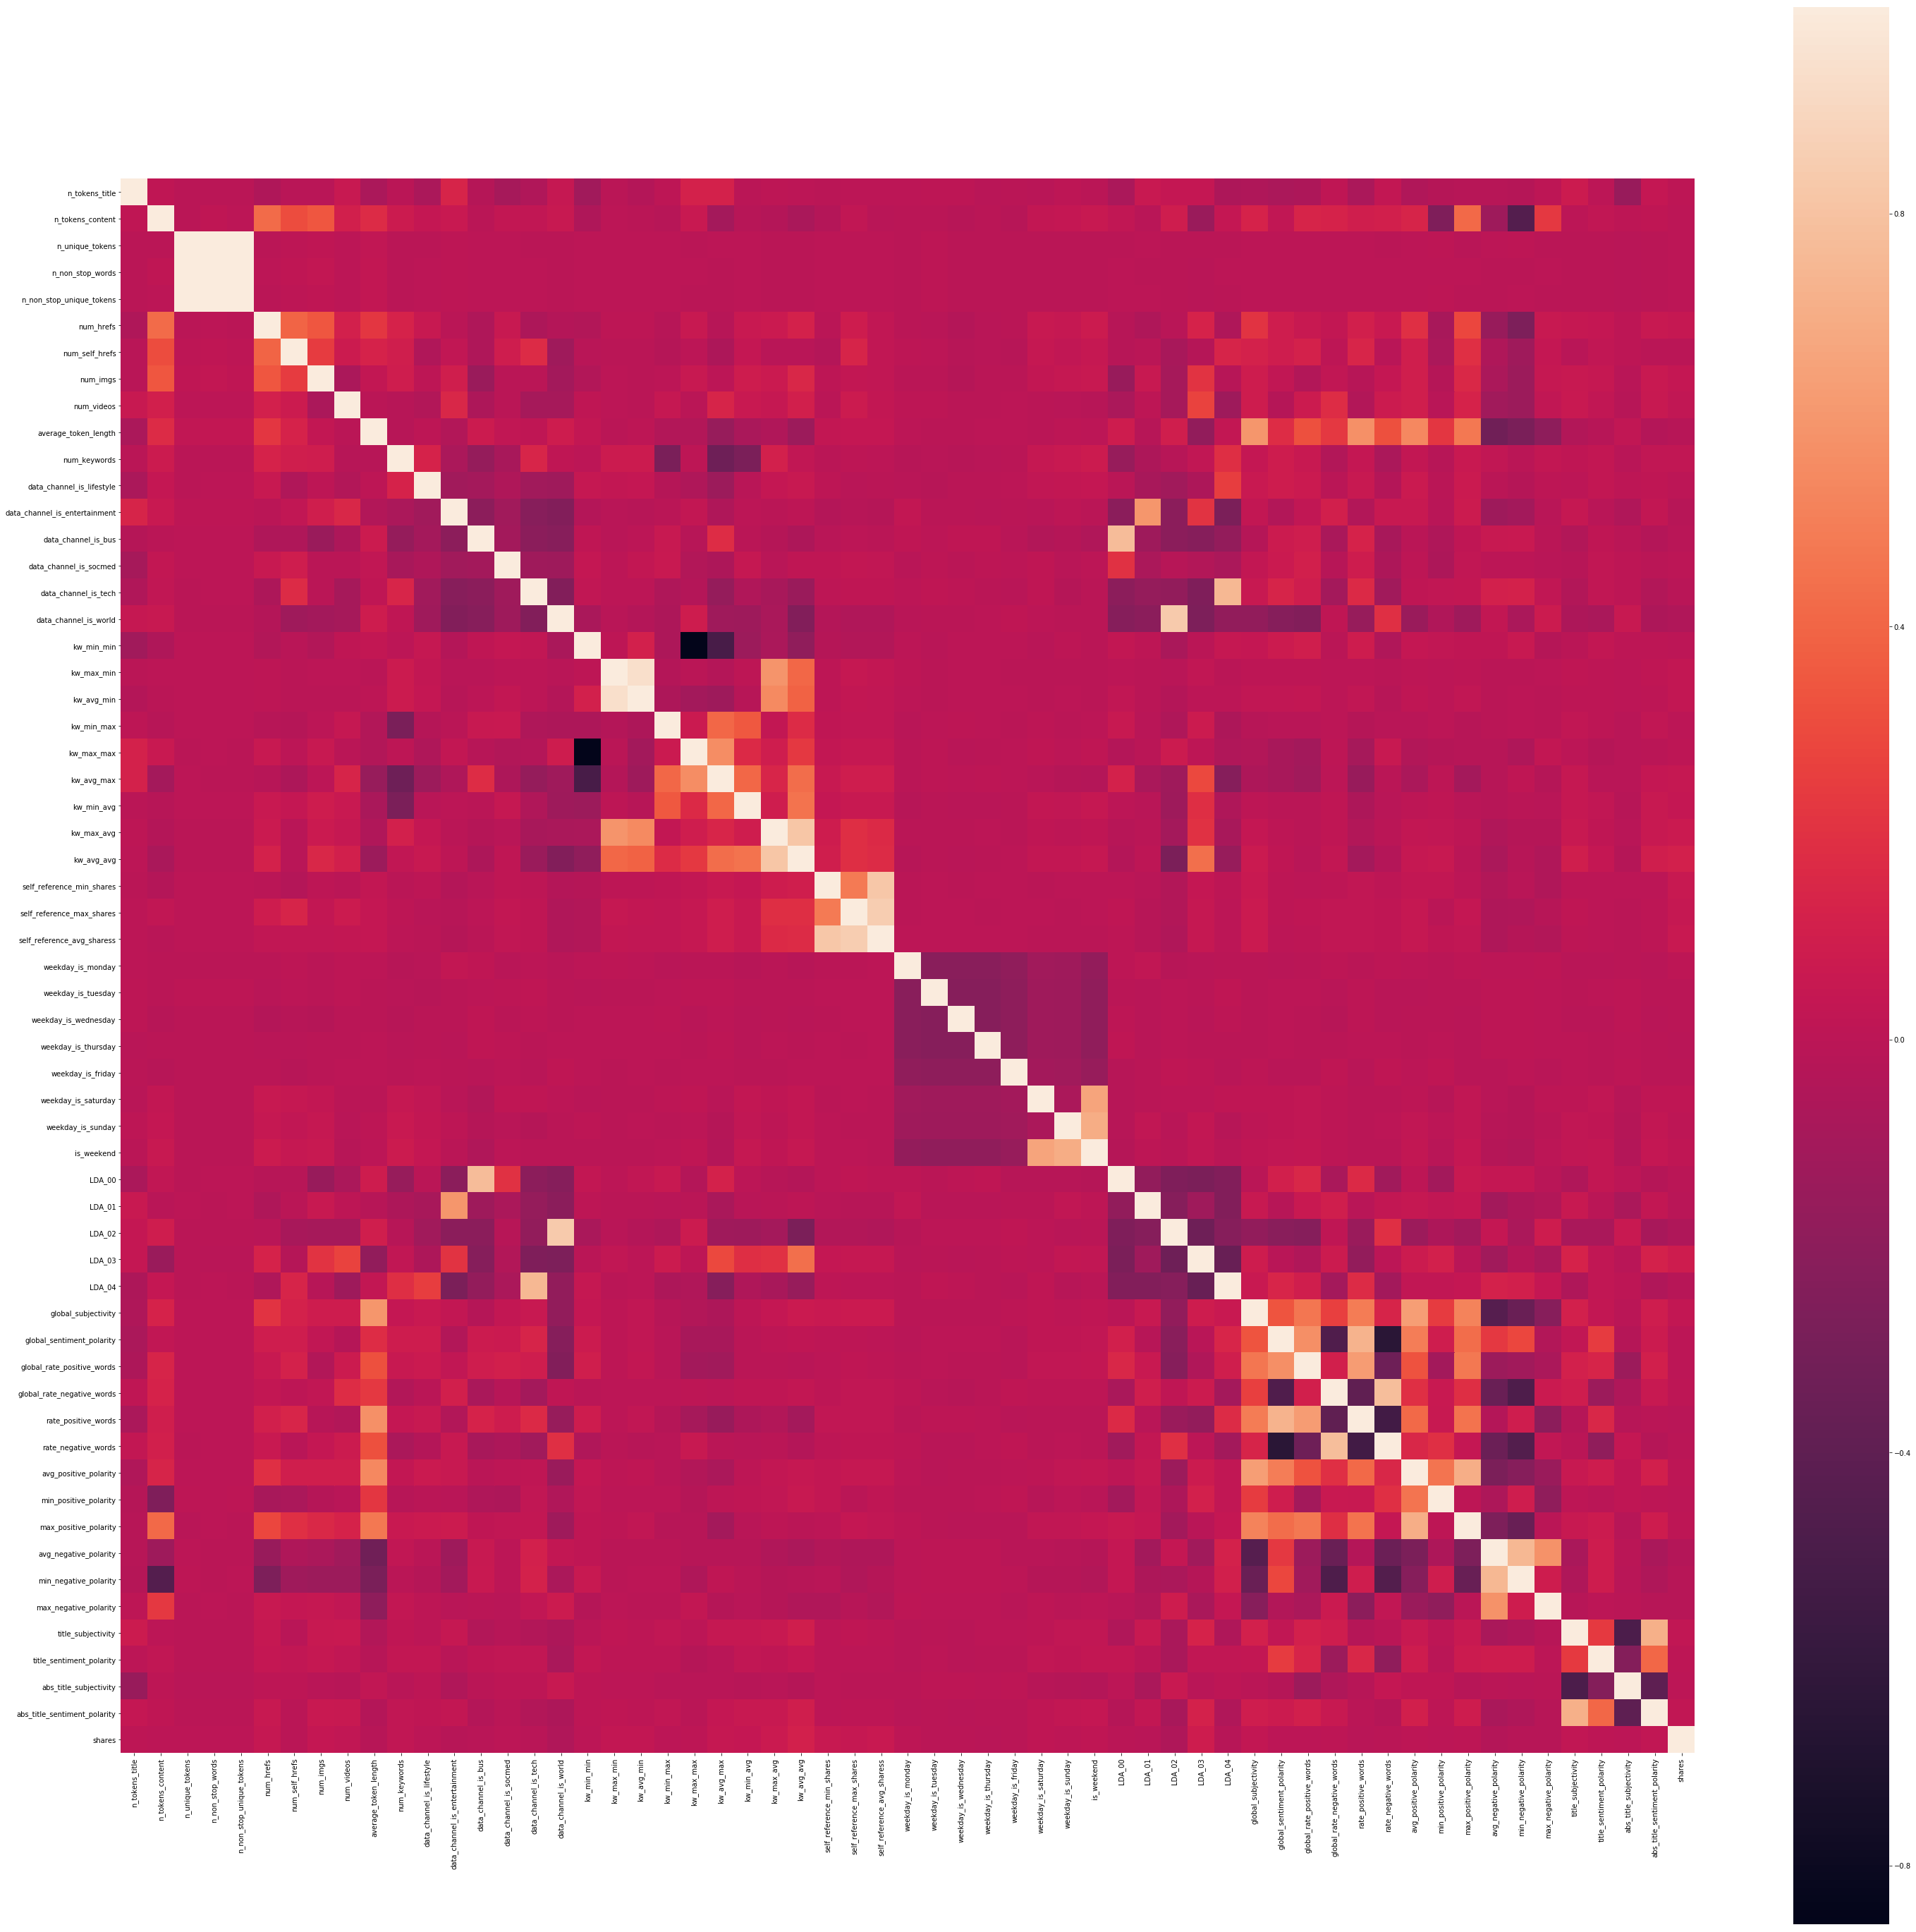

In [10]:
#plotting the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(50, 50))

sns.heatmap(corr_list, xticklabels=new_df.columns.values, yticklabels=new_df.columns.values, square = True)

# Logistic Regression

In [11]:
from sklearn import metrics

parameters = {'solver':('newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'), 'C':[1, 10]}
clf_lr = LogisticRegression()
#using GridSearchCV to find the best estimator
clf_lr_cv = GridSearchCV(clf_lr, parameters, cv=5).fit(X_train, y_train)
clf_lr_cv.predict(X_test)
clf_lr_cv.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conve

/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not 

0.6532980199268508

In [12]:
#computation of AUC for LR
LR_pred = clf_lr_cv.decision_function(X_test)
clf_lr_cv.score(X_test, y_test)
LR_AUC = metrics.roc_auc_score(y_test, LR_pred)
LR_fpr, LR_tpr, LR_thresh = metrics.roc_curve(y_test, LR_pred)

In [13]:
#best estimator for LR as identified by GridSearchCV
clf_lr_cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

# K Nearest Neighbor Classifier

In [14]:
parameters = {'n_neighbors':[10, 150]}
neigh = KNeighborsClassifier()
neigh_cv = GridSearchCV(neigh, parameters, cv=5).fit(X_train, y_train)
neigh_cv.predict(X_test)
neigh_cv.score(X_test, y_test)

0.5918779165090176

In [15]:
#calculation of AUC for KNN
KN_pred = neigh_cv.predict(X_test)
neigh_cv.score(X_test, y_test)
KN_AUC = metrics.roc_auc_score(y_test, KN_pred)
KN_fpr, KN_tpr, KN_thresh = metrics.roc_curve(y_test, KN_pred)

In [16]:
#best estimator for KNN as identified by GridSearchCV
neigh_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=150, p=2,
           weights='uniform')

# Random Forest Classifier

In [17]:
parameters = {'n_estimators':[10, 150], 'max_depth':[2, 100], 'min_samples_split':[2, 150], 'min_samples_leaf':[2, 150], 'criterion':('gini', 'entropy')
}
clf_rf = RandomForestClassifier()
#using GridSearchCV to find the best estimator
clf_rf_cv = GridSearchCV(clf_rf, parameters, cv=5).fit(X_train, y_train)
clf_rf_cv.predict(X_test)
clf_rf_cv.score(X_test, y_test)

0.6693151721528566

In [18]:
#calculation of AUC for Random Forest Classifier
RF_pred = clf_rf_cv.predict(X_test)
clf_rf_cv.score(X_test, y_test)
RF_AUC = metrics.roc_auc_score(y_test, RF_pred)
RF_fpr, RF_tpr, RF_thresh = metrics.roc_curve(y_test, RF_pred)

In [19]:
clf_rf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# LDA

In [20]:
parameters = {'solver':('svd', 'lsqr')}
clf_lda = LinearDiscriminantAnalysis()
#using GridSearchCV to find the best estimator
clf_lda_cv = GridSearchCV(clf_lda, parameters, cv=5).fit(X_train, y_train)
clf_lda_cv.predict(X_test)
clf_lda_cv.score(X_test, y_test)

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:294: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAP

0.6515323496027242

In [21]:
#calculation of AUC for LDA
LDA_pred = clf_lda_cv.predict(X_test)
clf_lda_cv.score(X_test, y_test)
LDA_AUC = metrics.roc_auc_score(y_test, LDA_pred)
LDA_fpr, LDA_tpr, LDA_thresh = metrics.roc_curve(y_test, LDA_pred)

In [22]:
clf_lda_cv.best_estimator_

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

# Gaussian Naive Bayes

In [23]:
clf_gnb = GaussianNB().fit(X_train, y_train)
clf_gnb.predict(X_test)
clf_gnb.score(X_test, y_test)

0.5073779795686719

In [24]:
GNB_pred = clf_gnb.predict(X_test)
clf_gnb.score(X_test, y_test)
#calculation of AUC for Gaussian NB
GNB_AUC = metrics.roc_auc_score(y_test, GNB_pred)
GNB_fpr, GNB_tpr, GNB_thresh = metrics.roc_curve(y_test, GNB_pred)

# Decision Tree Classifier

In [25]:
parameters = {'splitter':('best', 'random'), 'max_depth':[2, 150], 'min_samples_split':[2,150], 'min_samples_leaf':[2,150], 'max_features':('auto', 'sqrt', 'log2', None),'criterion':('gini', 'entropy') }
clf_dt = tree.DecisionTreeClassifier()
#using GridSearchCV to find the best estimator
clf_dt_cv = GridSearchCV(clf_dt, parameters, cv=5).fit(X_train, y_train)
clf_dt_cv.predict(X_test)
clf_dt_cv.score(X_test, y_test)

0.6396771345693025

In [26]:
DT_pred = clf_dt_cv.predict(X_test)
clf_dt_cv.score(X_test, y_test)
#calculation of AUC for Decision Tree Classifier
DT_AUC = metrics.roc_auc_score(y_test, DT_pred)
DT_fpr, DT_tpr, DT_thresh = metrics.roc_curve(y_test, DT_pred)

In [27]:
clf_dt_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=150,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

# Feature Importance

Feature importance is calculated based on the Decision Tree Classifier using the criterion as 'entropy'. 

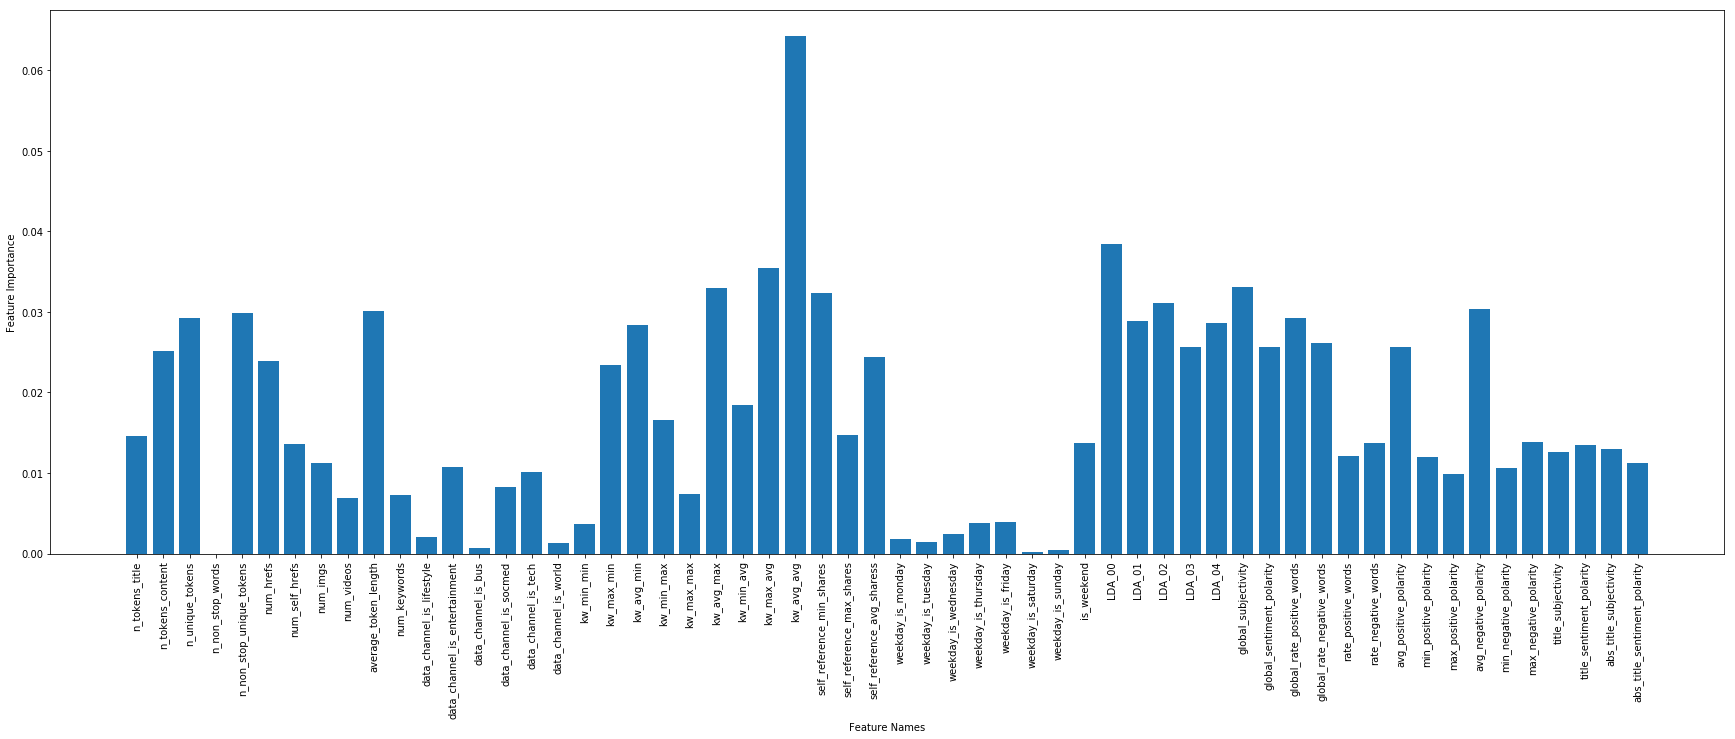

In [28]:
clf_dt = tree.DecisionTreeClassifier(criterion='entropy')
clf_dt = clf_dt.fit(X_train, y_train)

fea_imp = clf_dt.feature_importances_
fea_names = X_train.columns.values

plt.figure(figsize=(30,10))
plt.bar(fea_names, fea_imp)
plt.xlabel('Feature Names')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.show()


# ROC AUC curve for all the models

(0, 1)

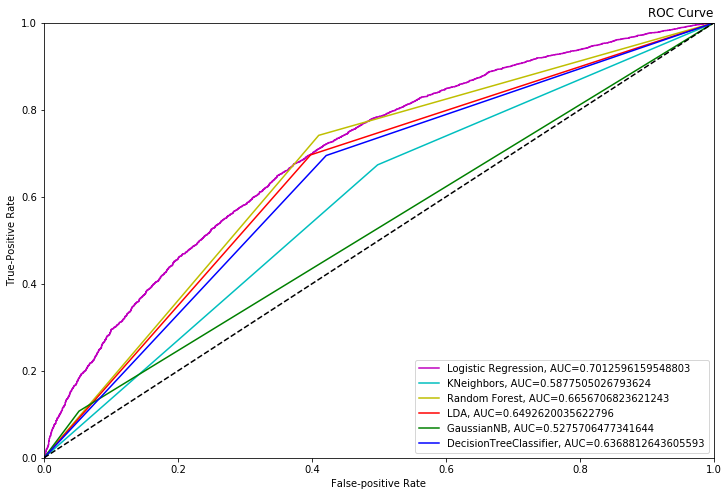

In [29]:
plt.figure(figsize=[12, 8])
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression, AUC='+str(LR_AUC), color = 'm')
plt.plot(KN_fpr, KN_tpr, label='KNeighbors, AUC='+str(KN_AUC), color = 'c')
plt.plot(RF_fpr, RF_tpr, label='Random Forest, AUC='+str(RF_AUC), color = 'y')
plt.plot(LDA_fpr, LDA_tpr, label='LDA, AUC='+str(LDA_AUC), color = 'r')
plt.plot(GNB_fpr, GNB_tpr, label='GaussianNB, AUC='+str(GNB_AUC), color = 'g')
plt.plot(DT_fpr, DT_tpr, label='DecisionTreeClassifier, AUC='+str(DT_AUC), color = 'b')
plt.plot([0, 1], [0, 1],'k--')
plt.xlabel("False-positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve", loc='right')
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])

# Principle Component Analysis

For the 58 predictive attributes, we apply Principle Component Analysis to reduce dimension of the data. PCA projects our original data of 58-dimensional subspace to a lower k-dimensional subspace to reserve as much variances as possible. The goal is to select a bucket of features that capture the most information about the dataset.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_train)

In [31]:
n_components = [i for i in range(1, 59)] #n_components
pca_var = []
for i in n_components: 
    pca = PCA(n_components = i)
    pca.fit(X_train)
    var = np.cumsum((pca.explained_variance_ratio_)*100) 
    pca_var.append(var[-1])

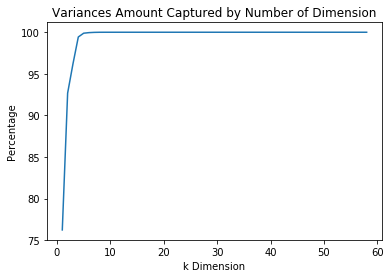

In [32]:
fig = plt.figure()
plt.plot(n_components, pca_var)
plt.title('Variances Amount Captured by Number of Dimension')
plt.ylabel('Percentage')
plt.xlabel('k Dimension')
plt.show()